In [1]:
import sys
sys.path.insert(0, f'C:/Users/galba/Seminar/Comp_assisted_math')
from numpy import vstack
from scipy.interpolate import lagrange
from util import Plotter
from regression import regression, trig_regression_ez, trig_regression_med

After importing all the necessary files, we will demonstrate few of the options of the code.
But first we have to define the parameters that we will work with.

In [2]:
POINT_COUNT = 20 # amount of points to be generated
REGRESSAND_DEGREE = 3 # degree of our approximating polynom
assert POINT_COUNT > REGRESSAND_DEGREE # making sure we're not getting a perfect fit.

# different parameters for what we want to see on our graph
DRAW_PTS = True 
DRAW_STEM = True
DRAW_REGRESSION = True
DRAW_TRIG_EZ = True
DRAW_TRIG_MED = True
DRAW_ERRORS = True
DRAW_LAGRANGE = True

We first initialize an object 'plotter' of the Plotter class, which deals with all the plotting related functions.

In [17]:
plotter = Plotter()
plotter.reset()

We will now define a stem function, around which we will add 'noisey' points, to serve as our data set of points we want to approximate.


Here, for example, we define the stem_func using the lambda function of python.
The lambda function allows us to define a function as a variable x, where then the function calculates
the term we've defined in it - 1/2 * x^2 and returns it, so that we can then use the variable stem_func like a function.


i.e. stem_func(2) will return 0.5 * 2^2 = 0.5 * 4 = 2.

In [18]:
stem_func = lambda x: 0.5 * x**2

Testing out the stem_func with input 2:

In [19]:
stem_func(2)

2.00000000000000

We will now show how we can, for example, generate those 'noisey' points around our stem function.

The function plot_pts, imported from our util.py file, is basically taking the stem function as an argument, additionally with the number of points we want to generate, the number of dimensions (2 in the code below) and a seed which allows us to 'unrandomize' the random noise addition, so we can reproduce the same reuslts over and over while still generating random points.

In [20]:
pts = plotter.get_datapts(stem_func, POINT_COUNT, 2, seed=0)

We can now plot these points in x-y axes using the plotter object:

In [21]:
plotter.plot_pts(pts[0], pts[1], 'o', color=(1, 0, 1))

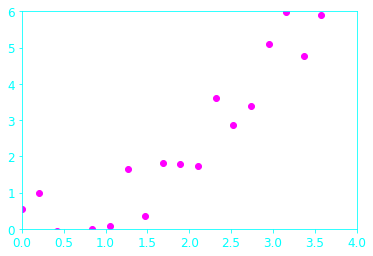

In [22]:
plotter.show()

Now let's continue and see what our stem functions 1/2 * x^2 looks like:

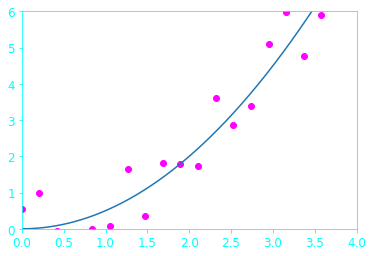

In [23]:
plotter.plot_func(stem_func)
plotter.show()

As we can see, the randomized points are really surrounding our stem function.
Next, we will approximate those points with a regressrand of $n$ degrees.

The function below calls the plot_func function of the plotter object with the argument regression(pts, REGRESSAND_DEGREE), which will return us a lambda function (like our stem_func) which is the approximation of our pts with REGRESSAND_DEGREE as the degree of this regressand.

In [24]:
plotter.plot_func(regression(pts, 2), color=(0,1,0))
xx = vstack([pts[0], pts[0]])
yy = vstack([pts[1], regression(pts, REGRESSAND_DEGREE)(pts[0])])
plotter.plot_pts(xx, yy, ".-.", color=(1, 0.5, 0))
reg_func = lambda x: regression(pts, REGRESSAND_DEGREE)(x)
# plotter.measure_error(reg_func, pts[1])

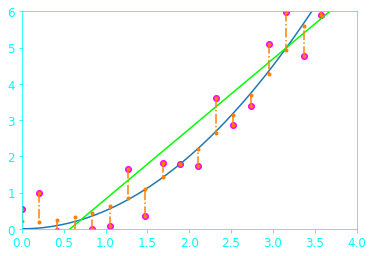

In [25]:
plotter.show()

As you can see, we get an approximation line (since degree is 2) which tries to minimize the squared distance from all of the points.  

We will now show an example of the lagrange polynom, which is an interpolation of the points in our dataset.  
First, we call the reset function of the plotter object, to remove all the information-to-be-plotted from its storage.


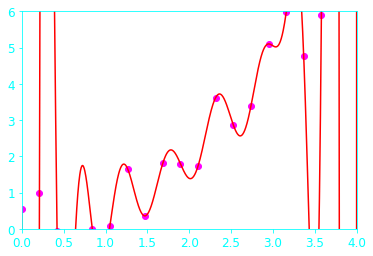

In [26]:
plotter.reset()
plotter.plot_pts(pts[0], pts[1], 'o', color=(1, 0, 1))
plotter.plot_func(lagrange(pts[0], pts[1]), color = (1,0,0))
plotter.show()

Beautiful, isn't it? But it's sadly an interpolation, which isn't gonna be helpful if we want to be able to predict data  
that doesn't exist in the original dataset of points.

In [29]:
plotter.reset()

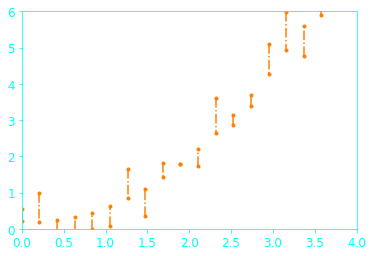

In [30]:
if DRAW_TRIG_EZ:
    plotter.plot_func(trig_regression_ez(pts), color = (1,0,0))
if DRAW_TRIG_MED:
    plotter.plot_func(trig_regression_med(pts), color = (1,0,0))
if DRAW_ERRORS:
    xx = vstack([pts[0], pts[0]])
    yy = vstack([pts[1], regression(pts, REGRESSAND_DEGREE)(pts[0])])
    plotter.plot_pts(xx, yy, ".-.", color=(1, 0.5, 0))
    reg_func = lambda x: regression(pts, REGRESSAND_DEGREE)(x)
    # plotter.measure_error(reg_func, pts[1])
plotter.show()